In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
from dinov2.data import collate_data_and_cast, DataAugmentationDINO, MaskingGenerator
from dinov2.data.augmentations import reapply,get_spatial_mask
from omegaconf import OmegaConf
from torchvision.datasets import ImageFolder
from matplotlib import pyplot as plt
from torchvision.transforms import ToTensor

In [3]:
class Crop:
    global_crops_scale = (0.32,1.0)
    local_crops_scale = (0.05,0.32)
    global_crops_size = 224
    local_crops_size = 96
    local_crops_number = 8
class CFG:
    crops = Crop
    
cfg = CFG()

In [113]:
data_transform = DataAugmentationDINO(
    cfg.crops.global_crops_scale,
    cfg.crops.local_crops_scale,
    cfg.crops.local_crops_number,
    global_crops_size=cfg.crops.global_crops_size,
    local_crops_size=cfg.crops.local_crops_size,
)

In [114]:
datasets = ImageFolder('/home/jacklishufan/imagenet/ILSVRC/in1k/train')

In [115]:
img = datasets[0][0]

In [116]:
msk = get_spatial_mask(3)

In [117]:

import torchvision.transforms.functional as F
from torchvision import transforms

In [118]:
img.size

(250, 250)

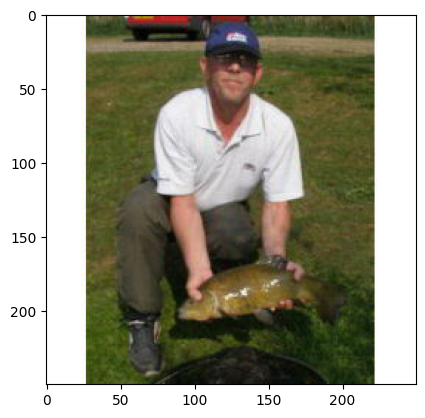

In [119]:
plt.imshow(img)

In [122]:
aug_out = data_transform(img)

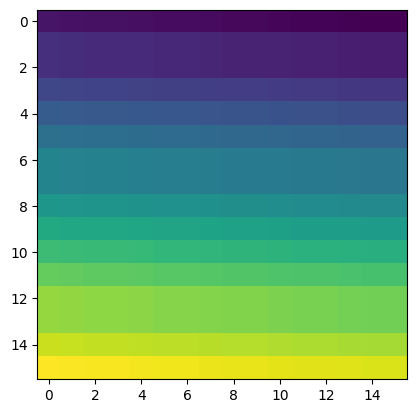

In [131]:
plt.imshow(aug_out['global_msks'][0][0])

In [132]:
aug_out['global_msks'][0][0].unique()

tensor([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26,  27,  31,  32,  33,  34,  35,  36,
         37,  38,  39,  40,  41,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  73,
         74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 171, 172, 173, 174, 175, 176, 177, 178,
        179, 180, 181])

In [108]:
aug_out['local_transforms']

[{'type': 'crop', 'parms': (82, 12, 117, 130, 250, 250)},
 {'type': 'hflip', 'parms': True}]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


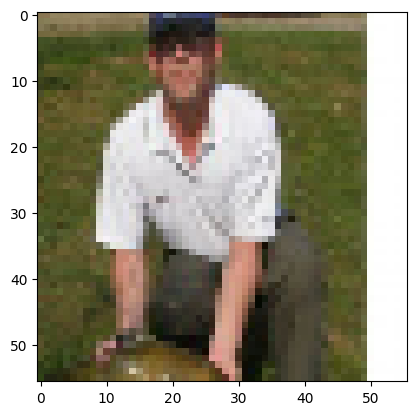

In [105]:
plt.imshow(reapply(ToTensor()(img),aug_out['local_trans'],(56,56)).permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


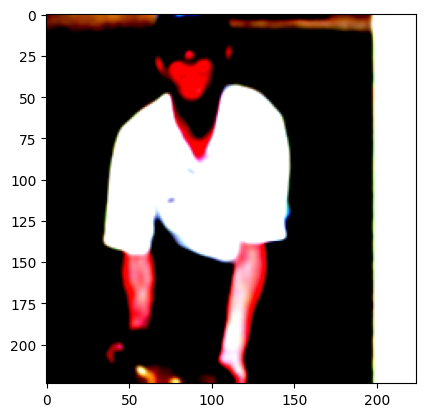

In [104]:
plt.imshow(aug_out['global_crops'][1].permute(1,2,0))

In [24]:
aug_out.keys()

dict_keys(['global_crops', 'global_crops_teacher', 'local_crops', 'offsets', 'global_transform_1', 'global_transform_2', 'local_transforms'])